<a href="https://colab.research.google.com/github/Awangnugrawan/Machine-Learning/blob/main/Prediksi_covid_19_di_INDONESIA_FINAL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV



In [ ]:
content = """Date
Location_ISO_Code
Location
New_Cases
New_Deaths
New_Recovered
New_Active_Cases
Total_Cases
Total_Deaths
Total_Recovered
Total_Active_Cases
Location_Level
City_or_Regency
Province
Country
Continent
Island
Time_Zone
Special_Status
Total_Regencies
Total_Cities
Total_Districts
Total_Urban_Villages
Total_Rural_Villages
Area_(km2)
Population
Population_Density
Longitude
Latitude
New_Cases_per_Million
Total_Cases_per_Million
New_Deaths_per_Million
Total_Deaths_per_Million
Case_Fatality_Rate
Case_Recovered_Rate
Growth_Factor_of_New_Cases
Growth_Factor_of_New_Deaths"""
columns_list = content.split("\n")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Machine learning/covid_19_indonesia_time_series_all.csv",header=0,names = columns_list,index_col=False)
data = data.set_index('Location')
data.head()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,0,2,39,20,75,-56,...,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN
DKI Jakarta,3/2/2020,ID-JK,2,0,0,2,41,20,75,-54,...,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0
Indonesia,3/2/2020,IDN,2,0,0,2,2,0,0,2,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN
Riau,3/2/2020,ID-RI,1,0,0,1,1,0,1,0,...,101.805109,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN
DKI Jakarta,3/3/2020,ID-JK,2,0,0,2,43,20,75,-52,...,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0


In [ ]:

data.isna().sum()

Date                               0
Location_ISO_Code                  0
New_Cases                          0
New_Deaths                         0
New_Recovered                      0
New_Active_Cases                   0
Total_Cases                        0
Total_Deaths                       0
Total_Recovered                    0
Total_Active_Cases                 0
Location_Level                     0
City_or_Regency                31822
Province                         929
Country                            0
Continent                          0
Island                           929
Time_Zone                        929
Special_Status                 27264
Total_Regencies                    0
Total_Cities                     901
Total_Districts                    0
Total_Urban_Villages             904
Total_Rural_Villages             929
Area_(km2)                         0
Population                         0
Population_Density                 0
Longitude                          0
L

In [ ]:
data.tail()

,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
Sulawesi Utara,9/15/2022,ID-SA,37,0,0,37,52770,1213,50997,560,...,124.521240,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85
Sumatera Barat,9/15/2022,ID-SB,13,0,3,10,104640,2371,102066,203,...,100.465062,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50
Sumatera Selatan,9/15/2022,ID-SS,16,0,1,15,82198,3376,78510,312,...,104.169465,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20
Sumatera Utara,9/15/2022,ID-SU,50,0,5,45,158866,3288,154924,654,...,99.051964,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92
Indonesia,9/16/2022,IDN,2358,27,2997,-666,6405044,157876,6218708,28460,...,113.921327,-0.789275,8.89,24153.07,0.1,595.34,59.53,2.46%,97.09%,0.89


In [ ]:
data.describe()

,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,City_or_Regency,Total_Regencies,...,Population,Population_Density,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Growth_Factor_of_New_Deaths
count,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,0.0,31822.000000,...,3.182200e+04,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,29883.000000
mean,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,5623.782415,NaN,24.027277,...,1.536766e+07,738.894928,113.700478,-2.725681,28.133292,11485.038800,0.640308,289.633640,28.963329,1.326795
std,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,28537.412305,NaN,68.359734,...,4.461714e+07,2729.431626,9.862068,3.608065,74.309710,16477.385479,1.933016,363.428724,36.342881,2.679379
min,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,NaN,1.000000,...,6.484070e+05,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,80.000000,NaN,7.000000,...,1.999539e+06,47.790000,106.109004,-6.204699,0.830000,1291.367500,0.000000,38.862500,3.890000,0.650000
50%,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,557.000000,NaN,11.000000,...,4.216171e+06,103.840000,113.417654,-2.461746,5.710000,6804.285000,0.000000,158.415000,15.840000,1.000000
75%,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,2279.000000,NaN,18.000000,...,9.095591e+06,262.700000,121.201093,0.212037,22.290000,14557.360000,0.540000,389.910000,38.990000,1.310000
max,64718.000000,2069.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,NaN,416.000000,...,2.651855e+08,16334.310000,138.696030,4.225615,1459.040000,130231.620000,63.800000,1632.600000,163.260000,175.000000


In [ ]:
data.info()
data[0:10]

<class 'pandas.core.frame.DataFrame'>
Index: 31822 entries, DKI Jakarta to Indonesia
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location_ISO_Code            31822 non-null  object 
 2   New_Cases                    31822 non-null  int64  
 3   New_Deaths                   31822 non-null  int64  
 4   New_Recovered                31822 non-null  int64  
 5   New_Active_Cases             31822 non-null  int64  
 6   Total_Cases                  31822 non-null  int64  
 7   Total_Deaths                 31822 non-null  int64  
 8   Total_Recovered              31822 non-null  int64  
 9   Total_Active_Cases           31822 non-null  int64  
 10  Location_Level               31822 non-null  object 
 11  City_or_Regency              0 non-null      float64
 12  Province                     30893 non-null  object 
 13  Country

,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,0,2,39,20,75,-56,...,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,192.31%,NaN
DKI Jakarta,3/2/2020,ID-JK,2,0,0,2,41,20,75,-54,...,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,182.93%,1.0
Indonesia,3/2/2020,IDN,2,0,0,2,2,0,0,2,...,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN
Riau,3/2/2020,ID-RI,1,0,0,1,1,0,1,0,...,101.805109,0.511648,0.16,0.16,0.00,0.00,0.00,0.00%,100.00%,NaN
DKI Jakarta,3/3/2020,ID-JK,2,0,0,2,43,20,75,-52,...,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,174.42%,1.0
Indonesia,3/3/2020,IDN,0,0,0,0,2,0,0,2,...,113.921327,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,0.0
Jawa Barat,3/3/2020,ID-JB,1,1,0,0,1,1,60,-60,...,107.603708,-6.920432,0.02,0.02,0.02,0.02,0.00,100.00%,6000.00%,NaN
Riau,3/3/2020,ID-RI,0,0,0,0,1,0,1,0,...,101.805109,0.511648,0.00,0.16,0.00,0.00,0.00,0.00%,100.00%,0.0
DKI Jakarta,3/4/2020,ID-JK,2,0,0,2,45,20,75,-50,...,106.836118,-6.204699,0.18,4.15,0.00,1.84,0.18,44.44%,166.67%,1.0


Location_ISO_Code New_Recovered Total_Cases Total_Deaths Total_Recovered Total_Active_Cases Longitude Latitude


In [ ]:
data = data[['Date','Location_ISO_Code','New_Cases','New_Deaths','Total_Cases','Total_Deaths','Total_Recovered','New_Active_Cases','Total_Active_Cases','Longitude','Latitude']]
data.head(1000)



,Date,Location_ISO_Code,New_Cases,New_Deaths,Total_Cases,Total_Deaths,Total_Recovered,New_Active_Cases,Total_Active_Cases,Longitude,Latitude
Location,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,39,20,75,2,-56,106.836118,-6.204699
DKI Jakarta,3/2/2020,ID-JK,2,0,41,20,75,2,-54,106.836118,-6.204699
Indonesia,3/2/2020,IDN,2,0,2,0,0,2,2,113.921327,-0.789275
Riau,3/2/2020,ID-RI,1,0,1,0,1,1,0,101.805109,0.511648
DKI Jakarta,3/3/2020,ID-JK,2,0,43,20,75,2,-52,106.836118,-6.204699
...,...,...,...,...,...,...,...,...,...,...,...
Indonesia,4/18/2020,IDN,325,15,6248,535,631,286,5082,113.921327,-0.789275
Jambi,4/18/2020,ID-JA,0,0,8,0,5,-1,3,102.723640,-1.697698
Jawa Barat,4/18/2020,ID-JB,11,0,551,77,156,7,318,107.603708,-6.920432


In [ ]:
# convert Date column to date type
data["Date"] = pd.to_datetime(data["Date"])


<ipython-input-12-4ff7fa493fd5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"] = pd.to_datetime(data["Date"])


# Visualization : Total_Cases & Total_Deaths

All Cases in Indonesia

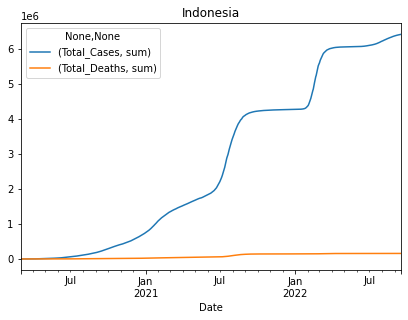

In [ ]:
#IDN
ConfirmedCases_date_IDN= data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_IDN = data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_IDN= ConfirmedCases_date_IDN.join(fatalities_date_IDN)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_IDN.plot(ax=plt.gca(), title='Indonesia')

# COVID19 cases in each province

Text(0, 0.5, 'Confirmed cases')

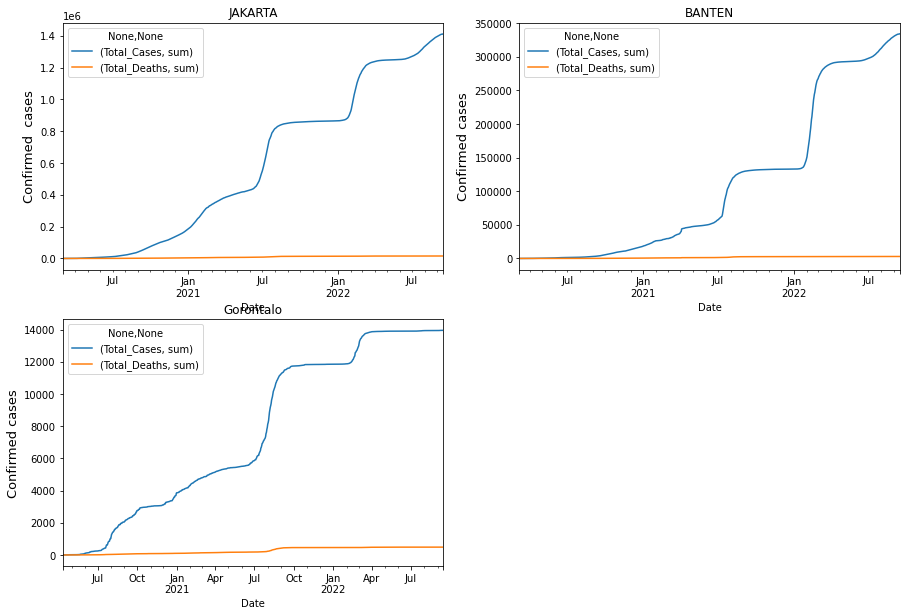

In [ ]:
#ID-JK
ConfirmedCases_date_JK= data[data['Location_ISO_Code']=='ID-JK'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_JK = data[data['Location_ISO_Code']=='ID-JK'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JK = ConfirmedCases_date_JK.join(fatalities_date_JK)


#ID-BT
ConfirmedCases_date_BT= data[data['Location_ISO_Code']=='ID-BT'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_BT = data[data['Location_ISO_Code']=='ID-BT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BT = ConfirmedCases_date_BT.join(fatalities_date_BT)


#ID-GO
ConfirmedCases_date_GO= data[data['Location_ISO_Code']=='ID-GO'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_GO = data[data['Location_ISO_Code']=='ID-GO'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_GO = ConfirmedCases_date_GO.join(fatalities_date_GO)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_JK.plot(ax=plt.gca(), title='JAKARTA')
plt.ylabel("Confirmed  cases", size=13)


plt.subplot(2, 2, 2)
total_date_BT.plot(ax=plt.gca(), title='BANTEN')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 3)
total_date_GO.plot(ax=plt.gca(), title='Gorontalo')
plt.ylabel("Confirmed cases", size=13)


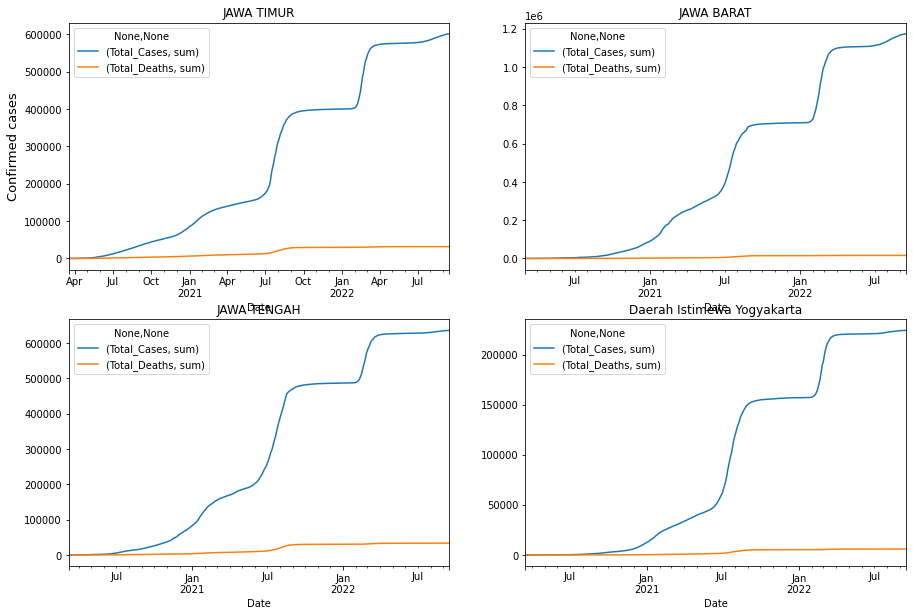

In [ ]:
#ID-JI
ConfirmedCases_date_JI= data[data['Location_ISO_Code']=='ID-JI'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_JI = data[data['Location_ISO_Code']=='ID-JI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JI = ConfirmedCases_date_JI.join(fatalities_date_JI)


#ID-JB
ConfirmedCases_date_JB= data[data['Location_ISO_Code']=='ID-JB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_JB = data[data['Location_ISO_Code']=='ID-JB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JB = ConfirmedCases_date_JB.join(fatalities_date_JB)


#ID-JT
ConfirmedCases_date_JT= data[data['Location_ISO_Code']=='ID-JT'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_JT = data[data['Location_ISO_Code']=='ID-JT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JT = ConfirmedCases_date_JT.join(fatalities_date_JT)


#ID-YO
ConfirmedCases_date_YO= data[data['Location_ISO_Code']=='ID-YO'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_YO = data[data['Location_ISO_Code']=='ID-YO'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_YO = ConfirmedCases_date_YO.join(fatalities_date_YO)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_JI.plot(ax=plt.gca(), title='JAWA TIMUR')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_JB.plot(ax=plt.gca(), title='JAWA BARAT')


plt.subplot(2, 2, 3)
total_date_JT.plot(ax=plt.gca(), title='JAWA TENGAH')

plt.subplot(2, 2, 4)
total_date_YO.plot(ax=plt.gca(), title='Daerah Istimewa Yogyakarta')

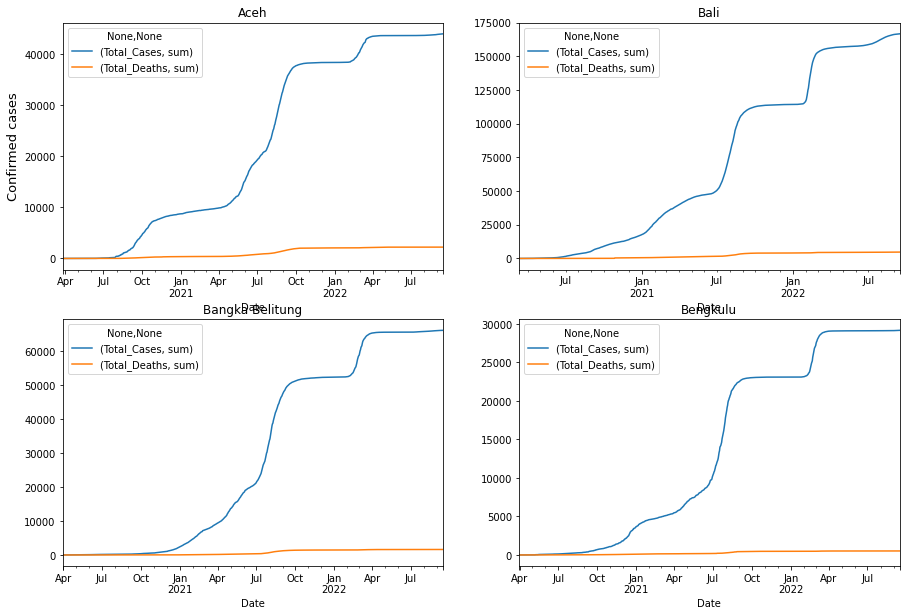

In [ ]:
#ID-AC
ConfirmedCases_date_AC= data[data['Location_ISO_Code']=='ID-AC'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_AC = data[data['Location_ISO_Code']=='ID-AC'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_AC = ConfirmedCases_date_AC.join(fatalities_date_AC)


#ID-BA
ConfirmedCases_date_BA= data[data['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_BA = data[data['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BA = ConfirmedCases_date_BA.join(fatalities_date_BA)


#ID-BB
ConfirmedCases_date_BB= data[data['Location_ISO_Code']=='ID-BB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_BB = data[data['Location_ISO_Code']=='ID-BB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BB = ConfirmedCases_date_BB.join(fatalities_date_BB)


#ID-BE
ConfirmedCases_date_BE= data[data['Location_ISO_Code']=='ID-BE'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_BE = data[data['Location_ISO_Code']=='ID-BE'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BE = ConfirmedCases_date_BE.join(fatalities_date_BE)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_AC.plot(ax=plt.gca(), title='Aceh')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_BA.plot(ax=plt.gca(), title='Bali')


plt.subplot(2, 2, 3)
total_date_BB.plot(ax=plt.gca(), title='Bangka Belitung')

plt.subplot(2, 2, 4)
total_date_BE.plot(ax=plt.gca(), title='Bengkulu')

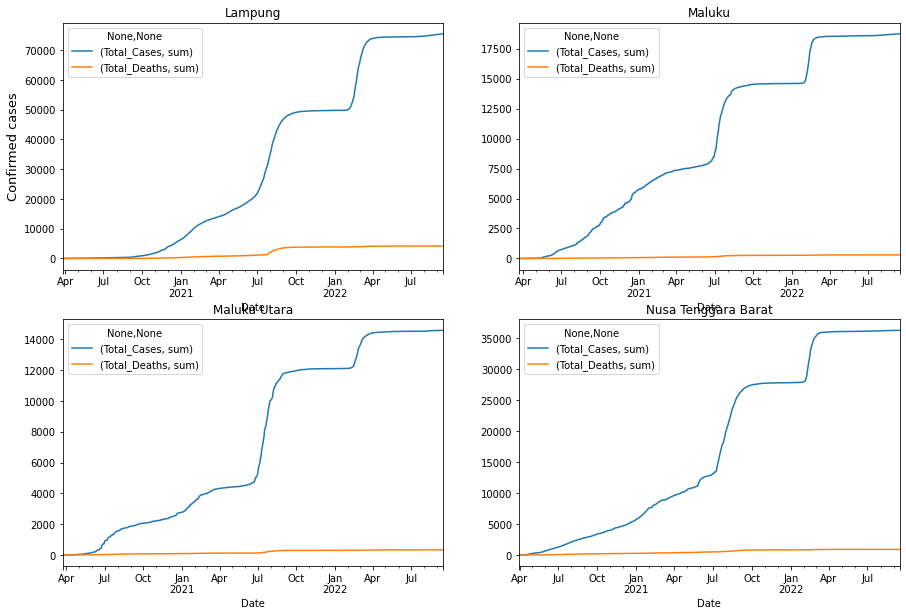

In [ ]:
#ID-LA
ConfirmedCases_date_LA= data[data['Location_ISO_Code']=='ID-LA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_LA = data[data['Location_ISO_Code']=='ID-LA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_LA = ConfirmedCases_date_LA.join(fatalities_date_LA)


#ID-MA
ConfirmedCases_date_MA= data[data['Location_ISO_Code']=='ID-MA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_MA = data[data['Location_ISO_Code']=='ID-MA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_MA = ConfirmedCases_date_MA.join(fatalities_date_MA)



#ID-MU
ConfirmedCases_date_MU= data[data['Location_ISO_Code']=='ID-MU'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_MU = data[data['Location_ISO_Code']=='ID-MU'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_MU = ConfirmedCases_date_MU.join(fatalities_date_MU)

#ID-NB
ConfirmedCases_date_NB= data[data['Location_ISO_Code']=='ID-NB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_NB = data[data['Location_ISO_Code']=='ID-NB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_NB = ConfirmedCases_date_NB.join(fatalities_date_NB)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_LA.plot(ax=plt.gca(), title='Lampung')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_MA.plot(ax=plt.gca(), title='Maluku')


plt.subplot(2, 2, 3)
total_date_MU.plot(ax=plt.gca(), title='Maluku Utara')

plt.subplot(2, 2, 4)
total_date_NB.plot(ax=plt.gca(), title='Nusa Tenggara Barat')

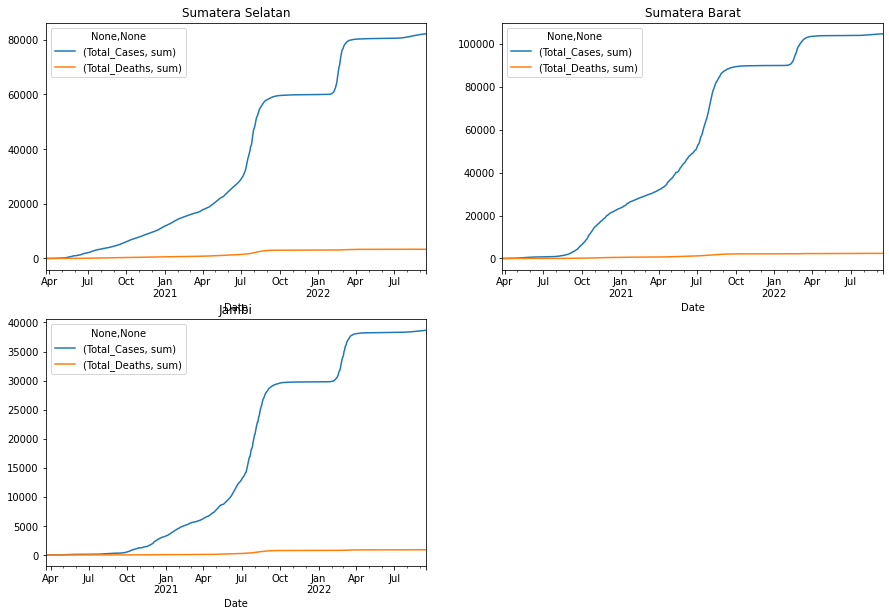

In [ ]:
#ID-SS
ConfirmedCases_date_SS= data[data['Location_ISO_Code']=='ID-SS'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_SS = data[data['Location_ISO_Code']=='ID-SS'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SS= ConfirmedCases_date_SS.join(fatalities_date_SS)

#ID-SB
ConfirmedCases_date_SB= data[data['Location_ISO_Code']=='ID-SB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_SB = data[data['Location_ISO_Code']=='ID-SB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SB = ConfirmedCases_date_SB.join(fatalities_date_SB)


#ID-JA
ConfirmedCases_date_JA= data[data['Location_ISO_Code']=='ID-JA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_JA = data[data['Location_ISO_Code']=='ID-JA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JA = ConfirmedCases_date_JA.join(fatalities_date_JA)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_SS.plot(ax=plt.gca(), title='Sumatera Selatan')


plt.subplot(2, 2, 2)
total_date_SB.plot(ax=plt.gca(), title='Sumatera Barat')


plt.subplot(2, 2, 3)
total_date_JA.plot(ax=plt.gca(), title='Jambi')

# Visualization : Total_Recovered & Total_Deaths

All Cases in Indonesia

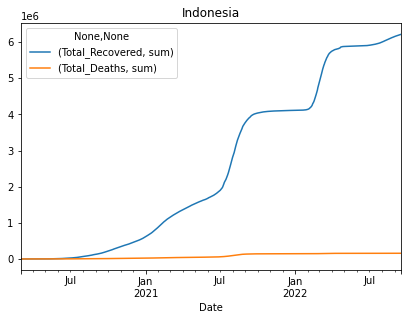

In [ ]:
#IDN
Total_Recovered_date_IDN= data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_IDN = data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_IDN= Total_Recovered_date_IDN.join(Total_Deaths_date_IDN)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_IDN.plot(ax=plt.gca(), title='Indonesia')

COVID19 cases in each province

Text(0, 0.5, 'Confirmed cases')

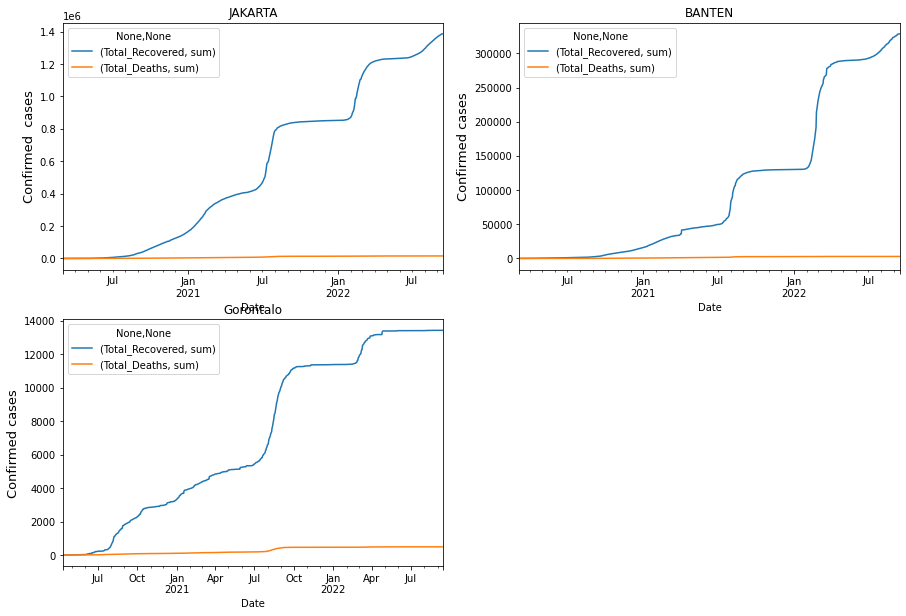

In [ ]:
#ID-JK
Total_Recovered_date_JK= data[data['Location_ISO_Code']=='ID-JK'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_JK = data[data['Location_ISO_Code']=='ID-JK'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JK = Total_Recovered_date_JK.join(Total_Deaths_date_JK)


#ID-BT
Total_Recovered_date_BT= data[data['Location_ISO_Code']=='ID-BT'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_BT = data[data['Location_ISO_Code']=='ID-BT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BT = Total_Recovered_date_BT.join(Total_Deaths_date_BT)


#ID-GO
Total_Recovered_date_GO= data[data['Location_ISO_Code']=='ID-GO'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_GO = data[data['Location_ISO_Code']=='ID-GO'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_GO = Total_Recovered_date_GO.join(Total_Deaths_date_GO)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_JK.plot(ax=plt.gca(), title='JAKARTA')
plt.ylabel("Confirmed  cases", size=13)


plt.subplot(2, 2, 2)
total_date_BT.plot(ax=plt.gca(), title='BANTEN')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 3)
total_date_GO.plot(ax=plt.gca(), title='Gorontalo')
plt.ylabel("Confirmed cases", size=13)

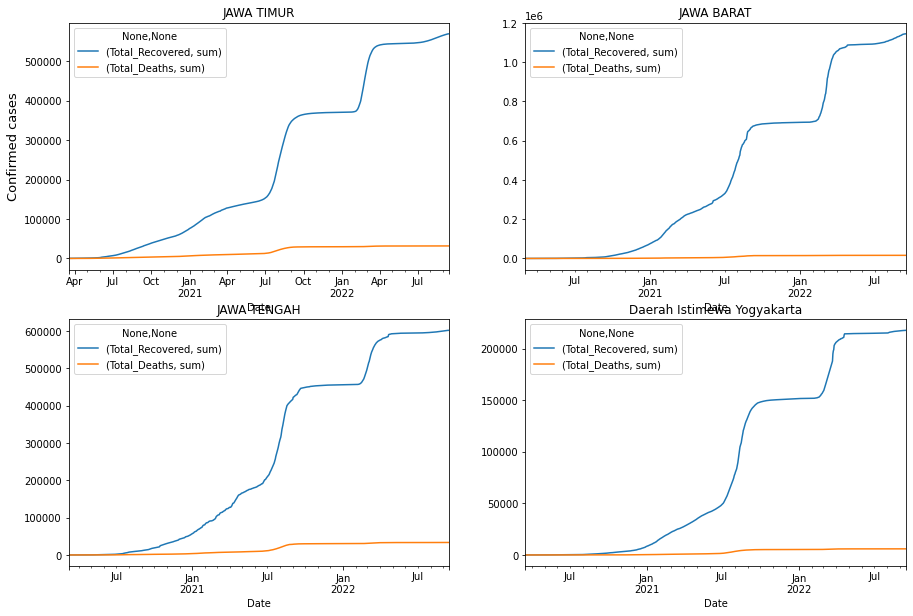

In [ ]:
#ID-JI
Total_Recovered_date_JI= data[data['Location_ISO_Code']=='ID-JI'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_JI = data[data['Location_ISO_Code']=='ID-JI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JI = Total_Recovered_date_JI.join(Total_Deaths_date_JI)


#ID-JB
Total_Recovered_date_JB= data[data['Location_ISO_Code']=='ID-JB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_JB = data[data['Location_ISO_Code']=='ID-JB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JB = Total_Recovered_date_JB.join(Total_Deaths_date_JB)


#ID-JT
Total_Recovered_date_JT= data[data['Location_ISO_Code']=='ID-JT'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_JT = data[data['Location_ISO_Code']=='ID-JT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JT = Total_Recovered_date_JT.join(Total_Deaths_date_JT)


#ID-YO
Total_Recovered_date_YO= data[data['Location_ISO_Code']=='ID-YO'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_YO = data[data['Location_ISO_Code']=='ID-YO'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_YO = Total_Recovered_date_YO.join(Total_Deaths_date_YO)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_JI.plot(ax=plt.gca(), title='JAWA TIMUR')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_JB.plot(ax=plt.gca(), title='JAWA BARAT')


plt.subplot(2, 2, 3)
total_date_JT.plot(ax=plt.gca(), title='JAWA TENGAH')

plt.subplot(2, 2, 4)
total_date_YO.plot(ax=plt.gca(), title='Daerah Istimewa Yogyakarta')

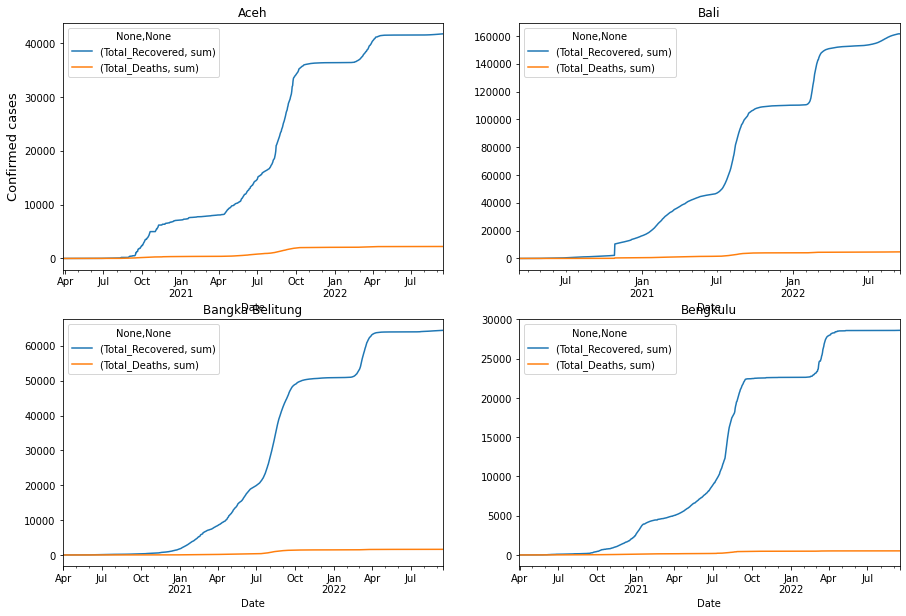

In [ ]:
#ID-AC
ConfirmedCases_date_AC= data[data['Location_ISO_Code']=='ID-AC'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_date_AC = data[data['Location_ISO_Code']=='ID-AC'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_AC = ConfirmedCases_date_AC.join(fatalities_date_AC)


#ID-BA
ConfirmedCases_date_BA= data[data['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_date_BA = data[data['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BA = ConfirmedCases_date_BA.join(fatalities_date_BA)


#ID-BB
ConfirmedCases_date_BB= data[data['Location_ISO_Code']=='ID-BB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_date_BB = data[data['Location_ISO_Code']=='ID-BB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BB = ConfirmedCases_date_BB.join(fatalities_date_BB)


#ID-BE
ConfirmedCases_date_BE= data[data['Location_ISO_Code']=='ID-BE'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_date_BE = data[data['Location_ISO_Code']=='ID-BE'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BE = ConfirmedCases_date_BE.join(fatalities_date_BE)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_AC.plot(ax=plt.gca(), title='Aceh')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_BA.plot(ax=plt.gca(), title='Bali')


plt.subplot(2, 2, 3)
total_date_BB.plot(ax=plt.gca(), title='Bangka Belitung')

plt.subplot(2, 2, 4)
total_date_BE.plot(ax=plt.gca(), title='Bengkulu')

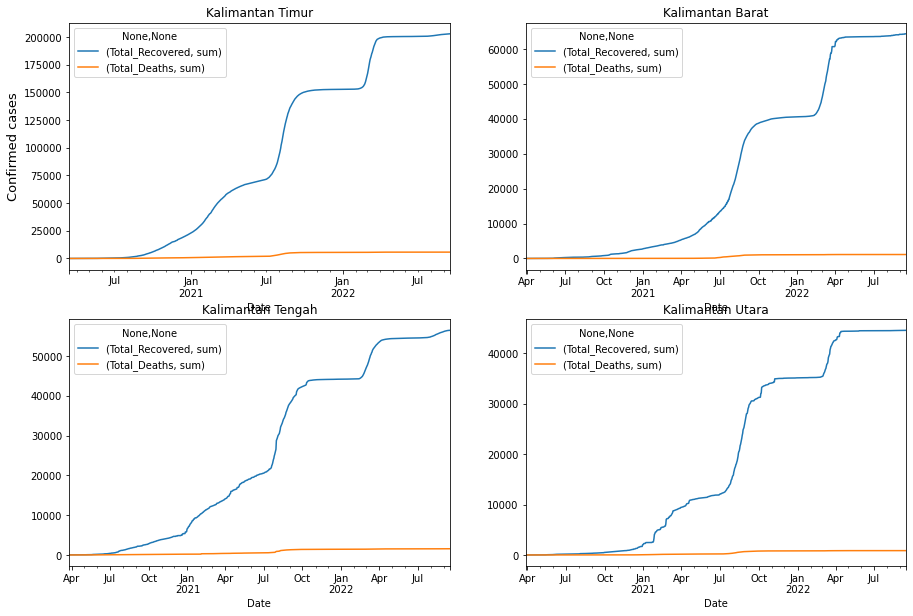

In [ ]:
#ID-KI
Total_Recovered_date_KI= data[data['Location_ISO_Code']=='ID-KI'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_KI = data[data['Location_ISO_Code']=='ID-KI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KI = Total_Recovered_date_KI.join(Total_Deaths_date_KI)


#ID-KB
Total_Recovered_date_KB= data[data['Location_ISO_Code']=='ID-KB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_KB = data[data['Location_ISO_Code']=='ID-KB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KB = Total_Recovered_date_KB.join(Total_Deaths_date_KB)

#ID-KT
Total_Recovered_date_KT= data[data['Location_ISO_Code']=='ID-KT'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_KT = data[data['Location_ISO_Code']=='ID-KT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KT = Total_Recovered_date_KT.join(Total_Deaths_date_KT)

#ID-KU
Total_Recovered_date_KU= data[data['Location_ISO_Code']=='ID-KU'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_KU = data[data['Location_ISO_Code']=='ID-KU'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KU = Total_Recovered_date_KU.join(Total_Deaths_date_KU)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_KI.plot(ax=plt.gca(), title='Kalimantan Timur')
plt.ylabel("Confirmed cases", size=13)

plt.subplot(2, 2, 2)
total_date_KB.plot(ax=plt.gca(), title='Kalimantan Barat')


plt.subplot(2, 2, 3)
total_date_KT.plot(ax=plt.gca(), title='Kalimantan Tengah')

plt.subplot(2, 2, 4)
total_date_KU.plot(ax=plt.gca(), title='Kalimantan Utara')

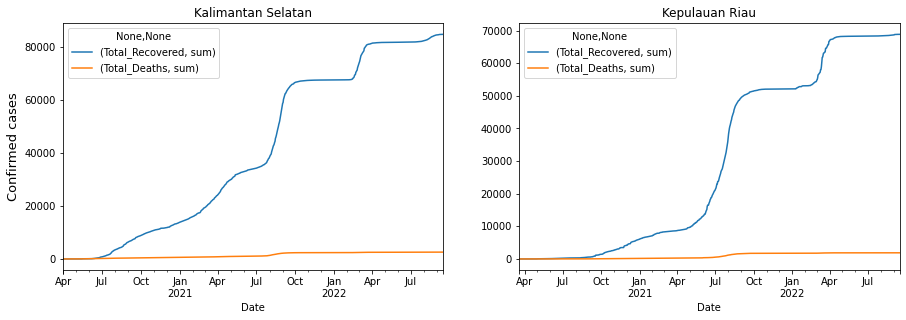

In [ ]:
#ID-KS
Total_Recovered_date_KS= data[data['Location_ISO_Code']=='ID-KS'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_KS = data[data['Location_ISO_Code']=='ID-KS'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KS = Total_Recovered_date_KS.join(Total_Deaths_date_KS)

#ID-KR
Total_Recovered_date_KR= data[data['Location_ISO_Code']=='ID-KR'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_KR = data[data['Location_ISO_Code']=='ID-KR'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KR = Total_Recovered_date_KR.join(Total_Deaths_date_KR)





plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_KS.plot(ax=plt.gca(), title='Kalimantan Selatan')

plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_KR.plot(ax=plt.gca(), title='Kepulauan Riau')

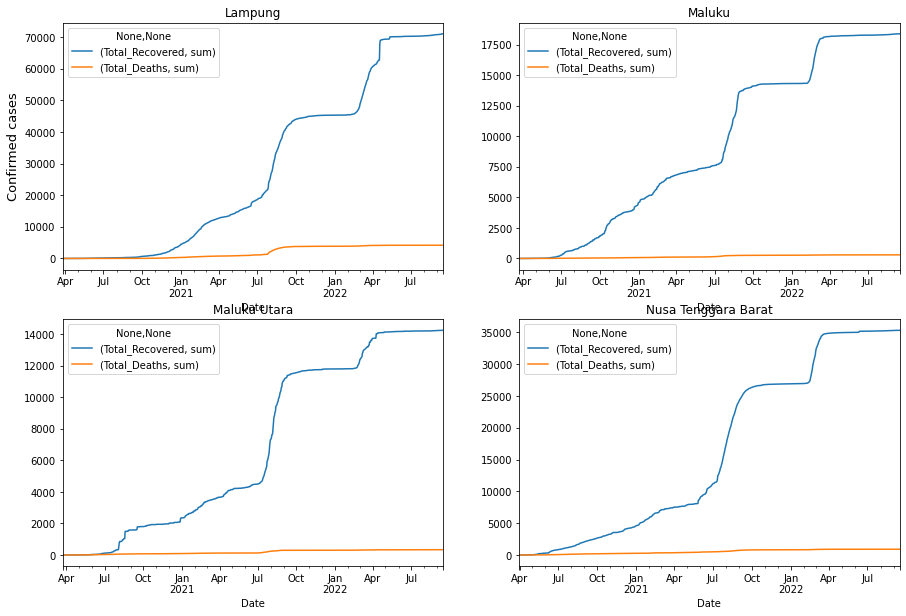

In [ ]:
#ID-LA
Total_Recovered_date_LA= data[data['Location_ISO_Code']=='ID-LA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_LA = data[data['Location_ISO_Code']=='ID-LA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_LA = Total_Recovered_date_LA.join(Total_Deaths_date_LA)


#ID-MA
Total_Recovered_date_MA= data[data['Location_ISO_Code']=='ID-MA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_MA = data[data['Location_ISO_Code']=='ID-MA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_MA = Total_Recovered_date_MA.join(Total_Deaths_date_MA)



#ID-MU
Total_Recovered_date_MU= data[data['Location_ISO_Code']=='ID-MU'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_MU = data[data['Location_ISO_Code']=='ID-MU'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_MU = Total_Recovered_date_MU.join(Total_Deaths_date_MU)

#ID-NB
Total_Recovered_date_NB= data[data['Location_ISO_Code']=='ID-NB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_NB = data[data['Location_ISO_Code']=='ID-NB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_NB = Total_Recovered_date_NB.join(Total_Deaths_date_NB)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_LA.plot(ax=plt.gca(), title='Lampung')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_MA.plot(ax=plt.gca(), title='Maluku')


plt.subplot(2, 2, 3)
total_date_MU.plot(ax=plt.gca(), title='Maluku Utara')

plt.subplot(2, 2, 4)
total_date_NB.plot(ax=plt.gca(), title='Nusa Tenggara Barat')

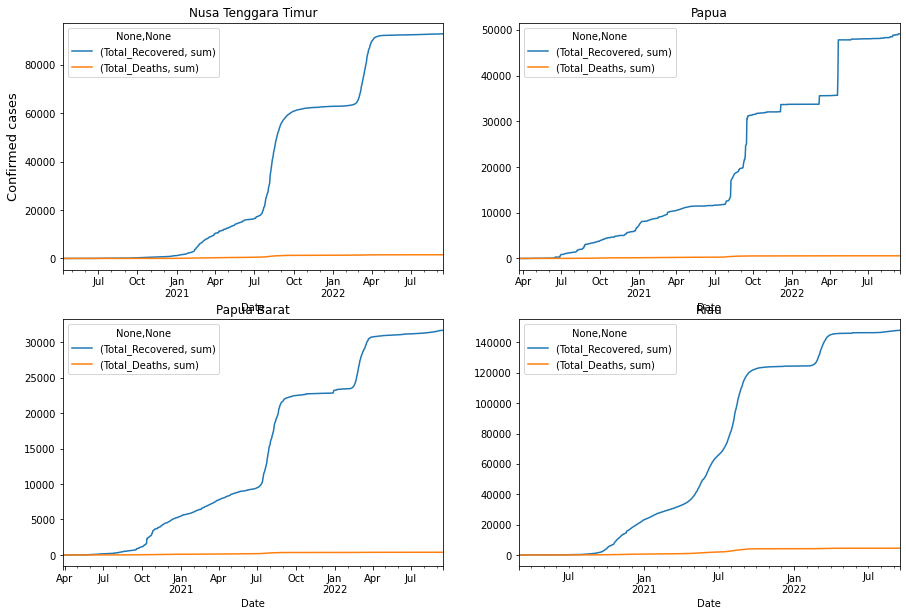

In [ ]:
#ID-NT
Total_Recovered_date_NT= data[data['Location_ISO_Code']=='ID-NT'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_NT = data[data['Location_ISO_Code']=='ID-NT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_NT = Total_Recovered_date_NT.join(Total_Deaths_date_NT)


#ID-PA
Total_Recovered_date_PA= data[data['Location_ISO_Code']=='ID-PA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_PA = data[data['Location_ISO_Code']=='ID-PA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_PA = Total_Recovered_date_PA.join(Total_Deaths_date_PA)

#ID-PB
Total_Recovered_date_PB= data[data['Location_ISO_Code']=='ID-PB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_PB = data[data['Location_ISO_Code']=='ID-PB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_PB = Total_Recovered_date_PB.join(Total_Deaths_date_PB)

#ID-RI
Total_Recovered_date_RI= data[data['Location_ISO_Code']=='ID-RI'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_RI = data[data['Location_ISO_Code']=='ID-RI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_RI= Total_Recovered_date_RI.join(Total_Deaths_date_RI)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_NT.plot(ax=plt.gca(), title='Nusa Tenggara Timur')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_PA.plot(ax=plt.gca(), title='Papua')


plt.subplot(2, 2, 3)
total_date_PB.plot(ax=plt.gca(), title='Papua Barat')

plt.subplot(2, 2, 4)
total_date_RI.plot(ax=plt.gca(), title='Riau')


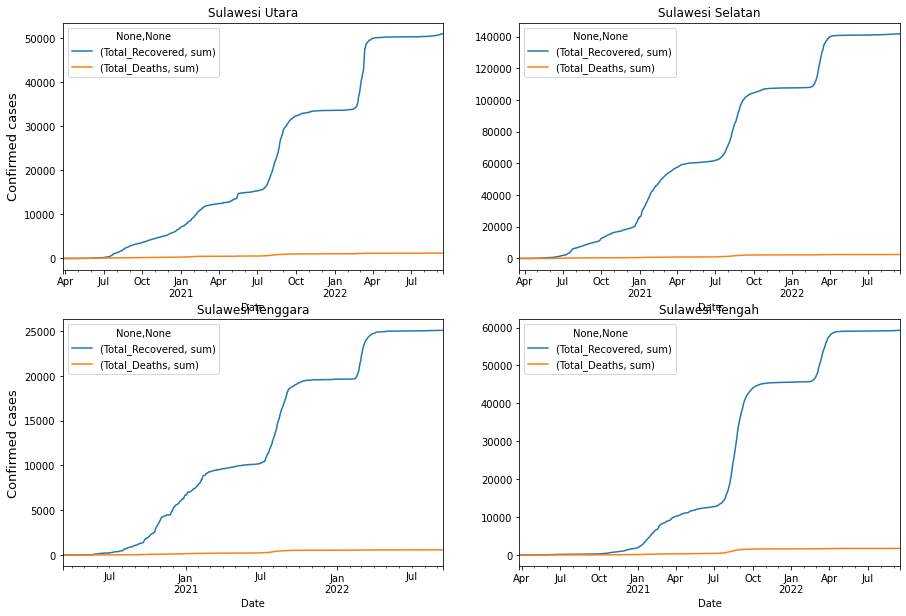

In [ ]:
#ID-SA
Total_Recovered_date_SA= data[data['Location_ISO_Code']=='ID-SA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_SA = data[data['Location_ISO_Code']=='ID-SA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SA = Total_Recovered_date_SA.join(Total_Deaths_date_SA)


#ID-SN
Total_Recovered_date_SN= data[data['Location_ISO_Code']=='ID-SN'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_SN = data[data['Location_ISO_Code']=='ID-SN'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SN = Total_Recovered_date_SN.join(Total_Deaths_date_SN)

#ID-SG
Total_Recovered_date_SG= data[data['Location_ISO_Code']=='ID-SG'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_SG = data[data['Location_ISO_Code']=='ID-SG'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SG = Total_Recovered_date_SG.join(Total_Deaths_date_SG)

#ID-ST
Total_Recovered_date_ST= data[data['Location_ISO_Code']=='ID-ST'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_ST = data[data['Location_ISO_Code']=='ID-ST'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_ST = Total_Recovered_date_ST.join(Total_Deaths_date_ST)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_SA.plot(ax=plt.gca(), title='Sulawesi Utara')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_SN.plot(ax=plt.gca(), title='Sulawesi Selatan')

plt.subplot(2, 2, 3)
total_date_SG.plot(ax=plt.gca(), title='Sulawesi Tenggara')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 4)
total_date_ST.plot(ax=plt.gca(), title='Sulawesi Tengah')

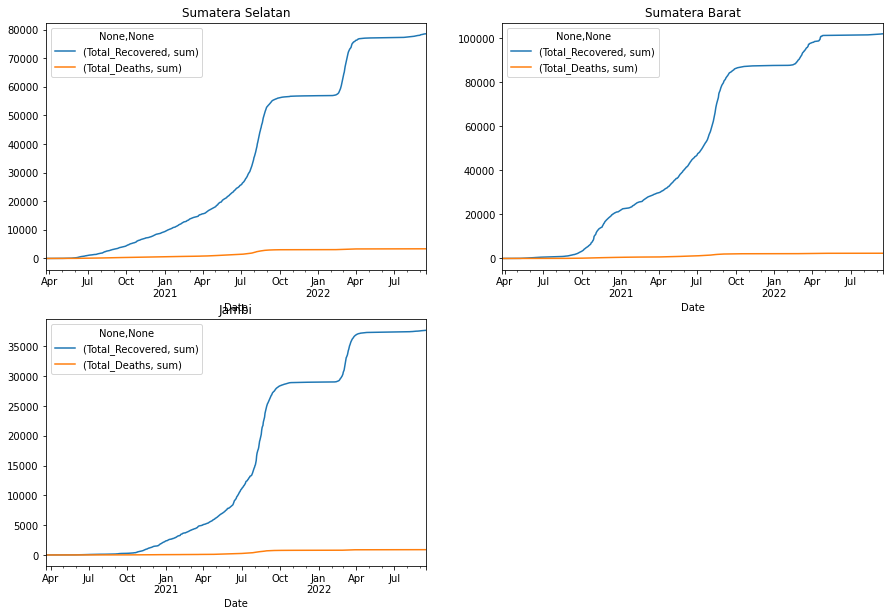

In [ ]:
#ID-SS
Total_Recovered_date_SS= data[data['Location_ISO_Code']=='ID-SS'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_SS = data[data['Location_ISO_Code']=='ID-SS'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SS= Total_Recovered_date_SS.join(Total_Deaths_date_SS)

#ID-SB
Total_Recovered_date_SB= data[data['Location_ISO_Code']=='ID-SB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_SB = data[data['Location_ISO_Code']=='ID-SB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SB = Total_Recovered_date_SB.join(Total_Deaths_date_SB)


#ID-JA
Total_Recovered_date_JA= data[data['Location_ISO_Code']=='ID-JA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_JA = data[data['Location_ISO_Code']=='ID-JA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JA = Total_Recovered_date_JA.join(Total_Deaths_date_JA)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_SS.plot(ax=plt.gca(), title='Sumatera Selatan')


plt.subplot(2, 2, 2)
total_date_SB.plot(ax=plt.gca(), title='Sumatera Barat')


plt.subplot(2, 2, 3)
total_date_JA.plot(ax=plt.gca(), title='Jambi')

# Visualization : Total_Cases & New_Active_Cases

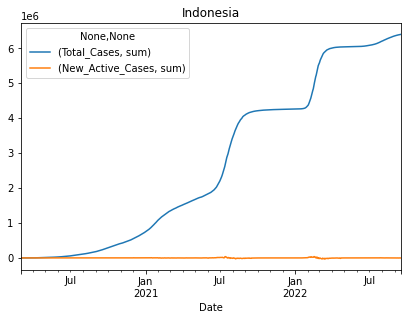

In [ ]:
# All Cases in Indonesia
#IDN
TotalCases_date_IDN= data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Cases':['sum']})
New_Active_Cases_date_IDN = data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'New_Active_Cases':['sum']})
total_date_IDN= TotalCases_date_IDN.join(New_Active_Cases_date_IDN)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_IDN.plot(ax=plt.gca(), title='Indonesia')

# Visualization : Total_Deaths & New_Deathss

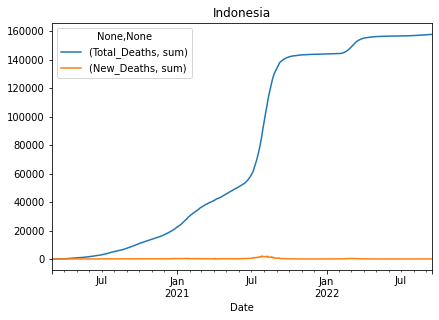

In [ ]:
# All Cases in Indonesia
#IDN
Total_Deaths_date_IDN= data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Deaths':['sum']})
New_Deaths_date_IDN = data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'New_Deaths':['sum']})
total_date_IDN= Total_Deaths_date_IDN.join(New_Deaths_date_IDN)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_IDN.plot(ax=plt.gca(), title='Indonesia')


# PREDICTION

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/Machine learning/covid_19_indonesia_time_series_all.csv",header=0,names = columns_list,index_col=False)
data1 = data1.set_index('Location')
data1.head()



/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,0,2,39,20,75,-56,...,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN
DKI Jakarta,3/2/2020,ID-JK,2,0,0,2,41,20,75,-54,...,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0
Indonesia,3/2/2020,IDN,2,0,0,2,2,0,0,2,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN
Riau,3/2/2020,ID-RI,1,0,0,1,1,0,1,0,...,101.805109,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN
DKI Jakarta,3/3/2020,ID-JK,2,0,0,2,43,20,75,-52,...,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0


In [ ]:
data1= data1.replace([np.inf, -np.inf], np.nan)
data1 = data1.fillna(0)
data1

,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,0,2,39,20,75,-56,...,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,0.00
DKI Jakarta,3/2/2020,ID-JK,2,0,0,2,41,20,75,-54,...,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00
Indonesia,3/2/2020,IDN,2,0,0,2,2,0,0,2,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,0.00
Riau,3/2/2020,ID-RI,1,0,0,1,1,0,1,0,...,101.805109,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,0.00
DKI Jakarta,3/3/2020,ID-JK,2,0,0,2,43,20,75,-52,...,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sulawesi Utara,9/15/2022,ID-SA,37,0,0,37,52770,1213,50997,560,...,124.521240,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85
Sumatera Barat,9/15/2022,ID-SB,13,0,3,10,104640,2371,102066,203,...,100.465062,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50
Sumatera Selatan,9/15/2022,ID-SS,16,0,1,15,82198,3376,78510,312,...,104.169465,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20


In [ ]:

data1.isna().sum()

Date                           0
Location_ISO_Code              0
New_Cases                      0
New_Deaths                     0
New_Recovered                  0
New_Active_Cases               0
Total_Cases                    0
Total_Deaths                   0
Total_Recovered                0
Total_Active_Cases             0
Location_Level                 0
City_or_Regency                0
Province                       0
Country                        0
Continent                      0
Island                         0
Time_Zone                      0
Special_Status                 0
Total_Regencies                0
Total_Cities                   0
Total_Districts                0
Total_Urban_Villages           0
Total_Rural_Villages           0
Area_(km2)                     0
Population                     0
Population_Density             0
Longitude                      0
Latitude                       0
New_Cases_per_Million          0
Total_Cases_per_Million        0
New_Deaths

Text(0.5, 1.0, 'Correlation between features`1')

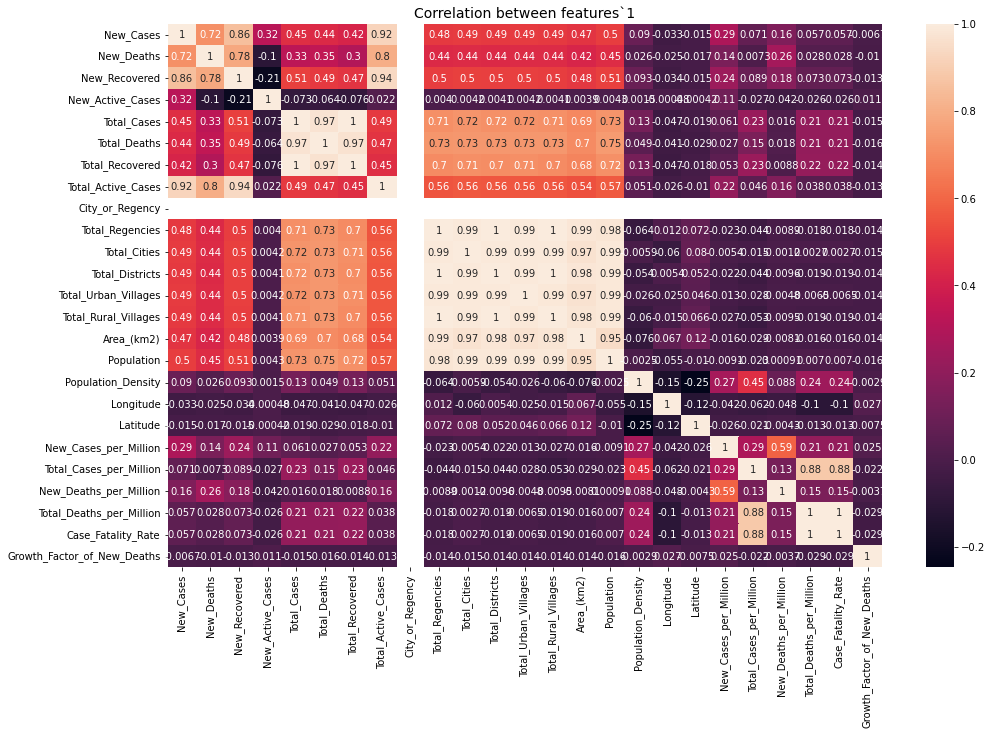

In [ ]:
import seaborn as sns
# create heatmap for the calculated correlation
plt.figure(figsize=(16,10))
sns.heatmap(data1[np.array(data1.columns)].corr(),annot=True, fmt='.2g')
plt.title('Correlation between features`1', fontsize=14)

In [ ]:
correlation2class = abs(data1.corr()['New_Cases'])
correlation2class.drop('New_Cases', inplace=True)
correlation2class.sort_values(ascending=False)

Total_Active_Cases             0.923300
New_Recovered                  0.856939
New_Deaths                     0.715800
Population                     0.495641
Total_Cities                   0.492910
Total_Urban_Villages           0.489969
Total_Districts                0.487948
Total_Rural_Villages           0.485134
Total_Regencies                0.484002
Area_(km2)                     0.471324
Total_Cases                    0.450040
Total_Deaths                   0.437586
Total_Recovered                0.415930
New_Active_Cases               0.319436
New_Cases_per_Million          0.286930
New_Deaths_per_Million         0.156476
Population_Density             0.090140
Total_Cases_per_Million        0.070781
Total_Deaths_per_Million       0.056529
Case_Fatality_Rate             0.056529
Longitude                      0.033361
Latitude                       0.015355
Growth_Factor_of_New_Deaths    0.006658
City_or_Regency                     NaN
Name: New_Cases, dtype: float64

In [ ]:
correlation2class = abs(data1.corr()['New_Deaths'])
correlation2class.drop('New_Deaths', inplace=True)
correlation2class.sort_values(ascending=False)

Total_Active_Cases             0.804404
New_Recovered                  0.782872
New_Cases                      0.715800
Population                     0.447464
Total_Urban_Villages           0.440773
Total_Cities                   0.440523
Total_Rural_Villages           0.440515
Total_Districts                0.439953
Total_Regencies                0.436884
Area_(km2)                     0.421582
Total_Deaths                   0.346205
Total_Cases                    0.330987
Total_Recovered                0.299173
New_Deaths_per_Million         0.260430
New_Cases_per_Million          0.142762
New_Active_Cases               0.102710
Total_Deaths_per_Million       0.028235
Case_Fatality_Rate             0.028235
Population_Density             0.026040
Longitude                      0.025241
Latitude                       0.016520
Growth_Factor_of_New_Deaths    0.010060
Total_Cases_per_Million        0.007347
City_or_Regency                     NaN
Name: New_Deaths, dtype: float64

This work, we tried to forecast COVID19 spreading in Indonesia. Variable prediction: Date

Location_ISO_Code
New_Recovered
Total_Cases
Total_Deaths
Total_Recovered
Total_Active_Cases
Longitude
Latitude
Target :

New_Cases
New_Deaths

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in data1.columns:
        if data1.dtypes[c] == object:
            print(c)
            le.fit(data1[c].astype(str))
            data1[c] = le.transform(data1[c].astype(str))

Date
Location_ISO_Code
Location_Level
Province
Country
Continent
Island
Time_Zone
Special_Status
Case_Recovered_Rate
Growth_Factor_of_New_Cases


In [ ]:

data1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 31822 entries, DKI Jakarta to Indonesia
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  int64  
 1   Location_ISO_Code            31822 non-null  int64  
 2   New_Cases                    31822 non-null  int64  
 3   New_Deaths                   31822 non-null  int64  
 4   New_Recovered                31822 non-null  int64  
 5   New_Active_Cases             31822 non-null  int64  
 6   Total_Cases                  31822 non-null  int64  
 7   Total_Deaths                 31822 non-null  int64  
 8   Total_Recovered              31822 non-null  int64  
 9   Total_Active_Cases           31822 non-null  int64  
 10  Location_Level               31822 non-null  int64  
 11  City_or_Regency              31822 non-null  float64
 12  Province                     31822 non-null  int64  
 13  Country

In [ ]:
correlation2class = abs(data1.corr()['New_Cases'])
correlation2class.drop('New_Cases', inplace=True)
correlation2class.sort_values(ascending=False)

Total_Active_Cases             0.923300
New_Recovered                  0.856939
New_Deaths                     0.715800
Population                     0.495641
Total_Cities                   0.492910
Total_Urban_Villages           0.489969
Total_Districts                0.487948
Location_Level                 0.485147
Total_Rural_Villages           0.485134
Total_Regencies                0.484002
Area_(km2)                     0.471324
Total_Cases                    0.450040
Total_Deaths                   0.437586
Total_Recovered                0.415930
New_Active_Cases               0.319436
New_Cases_per_Million          0.286930
Time_Zone                      0.224668
Island                         0.223640
Province                       0.191801
New_Deaths_per_Million         0.156476
Location_ISO_Code              0.103627
Population_Density             0.090140
Total_Cases_per_Million        0.070781
Total_Deaths_per_Million       0.056529
Case_Fatality_Rate             0.056529


In [ ]:
# correlation2class.index
correlation2class.sort_values(ascending=False).index

Index(['Total_Active_Cases', 'New_Recovered', 'New_Deaths', 'Population',
       'Total_Cities', 'Total_Urban_Villages', 'Total_Districts',
       'Location_Level', 'Total_Rural_Villages', 'Total_Regencies',
       'Area_(km2)', 'Total_Cases', 'Total_Deaths', 'Total_Recovered',
       'New_Active_Cases', 'New_Cases_per_Million', 'Time_Zone', 'Island',
       'Province', 'New_Deaths_per_Million', 'Location_ISO_Code',
       'Population_Density', 'Total_Cases_per_Million',
       'Total_Deaths_per_Million', 'Case_Fatality_Rate', 'Longitude',
       'Special_Status', 'Growth_Factor_of_New_Cases', 'Latitude', 'Date',
       'Growth_Factor_of_New_Deaths', 'Case_Recovered_Rate', 'City_or_Regency',
       'Country', 'Continent'],
      dtype='object')

# DROP DATA

In [ ]:
df_merge_drop = correlation2class.sort_values(ascending=False)[ correlation2class.sort_values(ascending=False).index[:14] ]

In [ ]:
column_names = df_merge_drop.index
column_names

Index(['Total_Active_Cases', 'New_Recovered', 'New_Deaths', 'Population',
       'Total_Cities', 'Total_Urban_Villages', 'Total_Districts',
       'Location_Level', 'Total_Rural_Villages', 'Total_Regencies',
       'Area_(km2)', 'Total_Cases', 'Total_Deaths', 'Total_Recovered'],
      dtype='object')

In [ ]:
df_merge_drop.head()

Total_Active_Cases    0.923300
New_Recovered         0.856939
New_Deaths            0.715800
Population            0.495641
Total_Cities          0.492910
Name: New_Cases, dtype: float64

In [ ]:
data1.head()

,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,302,9,2,0,0,2,39,20,75,-56,...,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,946,529,0.0
DKI Jakarta,335,9,2,0,0,2,41,20,75,-54,...,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,837,472,1.0
Indonesia,335,34,2,0,0,2,2,0,0,2,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0,0,0.0
Riau,335,24,1,0,0,1,1,0,1,0,...,101.805109,0.511648,0.16,0.16,0.0,0.00,0.00,0,53,0.0
DKI Jakarta,368,9,2,0,0,2,43,20,75,-52,...,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,834,425,1.0


# SPLITING DATA

Data for training and testing To select a set of training data that will be input in the Machine Learning algorithm, to ensure that the classification algorithm training can be generalized well to new data. For this study using a sample size of 10% ( aims to reduce the overfitting effect).

# Target 1 : New_Cases

In [ ]:
from sklearn.model_selection import train_test_split
y = data1['New_Cases']
X = data1.drop(columns=['New_Cases'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=9)

In [ ]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (28639, 35)
Y train shape:  (28639,)
X test shape:  (3183, 35)
Y test shape:  (3183,)


## Decision tree classification
A decision tree is a flowchart-like tree structure where an internal node represents feature, the branch represents a decision rule, and each leaf node represents the outcome. The decision tree analyzes a set of data to construct a set of rules or questions, which are used to predict a class, i.e., the goal of decision tree is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. In this sense the decision tree selects the best attribute using to divide the records, converting that attribute into a decision node and dividing the data set into smaller subsets, to finally start the construction of the tree repeating this process recursively.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# We define the model
dtcla = DecisionTreeClassifier(random_state=None )

# We train model
dtcla.fit(X_train, y_train)

# We predict target values
y_pred = dtcla.predict(X_test)

print('Model Performance using DTCLA:')
print('Accuracy Score   :',accuracy_score(y_test, y_pred))
print('Precision Score  :',precision_score(y_test, y_pred,average = 'weighted'))
print('F1 Score         :',f1_score(y_test, y_pred, average = 'weighted'))

## NAIVE BAYES

In [ ]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi naive bayes
nbtrain = modelnb.fit(X_train, y_train)

y_pred =nbtrain.predict(X_test)

print('Model Performance using NB:')
print('Accuracy Score :',accuracy_score(y_test, y_pred))
print('Precision Score :',precision_score(y_test, y_pred,average = 'weighted'))
print('F1 Score :',f1_score(y_test, y_pred, average = 'weighted'))

In [ ]:
def model_metrics(model, X_test, y_test, decimals = 3):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = np.round(accuracy_score(y_test, y_pred)*100,decimals)
    pre = np.round(precision_score(y_test, y_pred,average = 'weighted')*100,decimals)
    rec = np.round(recall_score(y_test, y_pred,average = 'weighted')*100,decimals)
    f1 = np.round(f1_score(y_test, y_pred,average = 'weighted')*100,decimals)
    
    return {'accuracy': acc, 'precision': pre, 'recall': rec, 'f1_score': f1}

In [ ]:
table_model_result = pd.DataFrame(
    [
        model_metrics(dtcla, X_test, y_test),
        model_metrics(nbtrain, X_test, y_test),
    ], 
    index = ['Decision Tree Classification', 'Naive Bayes']) \
.reset_index() \
.rename(columns={'index':'Model'})

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is 

In [ ]:
table_model_result.sort_values(['accuracy', 'f1_score'],
              ascending = [False, False])

,Model,accuracy,precision,recall,f1_score
0,Decision Tree Classification,62.928,63.749,62.928,62.777
1,Naive Bayes,10.682,3.265,10.682,4.769


# Target 2 : New_Deaths

In [ ]:
from sklearn.model_selection import train_test_split
y1 = data1['New_Deaths']
X1 = data1.drop(columns=['New_Deaths'])
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, random_state=9)

In [ ]:
print('X1 train shape: ', X1_train.shape)
print('y1 train shape: ', y1_train.shape)
print('X1 test shape: ', X1_test.shape)
print('y1 test shape: ', y1_test.shape)

X1 train shape:  (28639, 35)
y1 train shape:  (28639,)
X1 test shape:  (3183, 35)
y1 test shape:  (3183,)


## Decision tree classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# We define the model
dtcla2 = DecisionTreeClassifier(random_state=None)

# We train model
dtcla2.fit(X1_train, y1_train)

# We predict target values
y1_pred = dtcla2.predict(X1_test)

print('Model Performance using DTCLA:')
print('Accuracy Score  :',accuracy_score(y1_test, y1_pred))
print('Precision Score :',precision_score(y1_test, y1_pred,average = 'weighted'))
print('F1 Score        :',f1_score(y1_test, y1_pred, average = 'weighted'))

Model Performance using DTCLA:
Accuracy Score  : 0.9421928997800817
Precision Score : 0.9459291059445606
F1 Score        : 0.9424397263658635


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## NAIVE BAYES

In [ ]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi naive bayes
nbtrain2 = modelnb.fit(X1_train, y1_train)

y1_pred =nbtrain2.predict(X1_test)

print('Model Performance using NB:')
print('Accuracy Score  :',accuracy_score(y1_test, y1_pred))
print('Precision Score :',precision_score(y1_test, y1_pred,average = 'weighted'))
print('F1 Score        :',f1_score(y1_test, y1_pred, average = 'weighted'))

Model Performance using NB:
Accuracy Score  : 0.5224630851398052
Precision Score : 0.35305631027945056
F1 Score        : 0.41228428019654784


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def model_metrics(model, X1_test, y1_test, decimals = 3):
    model.fit(X1_train, y1_train)
    y1_pred = model.predict(X1_test)
    acc = np.round(accuracy_score(y1_test, y1_pred)*100,decimals)
    pre = np.round(precision_score(y1_test, y1_pred,average = 'weighted')*100,decimals)
    rec = np.round(recall_score(y1_test, y1_pred,average = 'weighted')*100,decimals)
    f1 = np.round(f1_score(y1_test, y1_pred,average = 'weighted')*100,decimals)
    
    return {'accuracy': acc, 'precision': pre, 'recall': rec, 'f1_score': f1}

In [ ]:
table_model_result2 = pd.DataFrame(
    [
        model_metrics(dtcla2, X1_test, y1_test),
        model_metrics(nbtrain2, X1_test, y1_test),
    ], 
    index = ['Decision Tree Classification', 'Naive Bayes']) \
.reset_index() \
.rename(columns={'index':'Model'})

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is 

In [ ]:
table_model_result2.sort_values(['accuracy', 'f1_score'],
              ascending = [False, False])

,Model,accuracy,precision,recall,f1_score
0,Decision Tree Classification,94.439,94.938,94.439,94.495
1,Naive Bayes,52.246,35.306,52.246,41.228


from sklearn import svm

svm_model = svm.SVC(random_state=0) 
svm_model = svm_model.fit(X_train, y_train)

y_pred =svm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_absolute_error

score1 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("R2_SCORE New_cases = ", score1)
print("MAE New_cases = ", mae)



from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0) 
rf_model = rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)



# FINAL RESULT